# [Day 14](https://adventofcode.com/2022/day/14)

## Pretty drawing

In [1]:
import drawSvg
from IPython.display import SVG

def display_area_svg(area, scale = 10):
    min_x = 500
    max_x = 500
    min_y = 0
    max_y = 0
    for coord in area:
        min_x = min(coord[0], min_x)
        max_x = max(coord[0], max_x)
        min_y = min(coord[1], min_y)
        max_y = max(coord[1], max_y)
    display(f"min: {(min_x, min_y)}")
    display(f"max: {(max_x, max_y)}")
    width = max_x-min_x+1
    height = max_y-min_y+1
    drawing = drawSvg.Drawing(width*scale, height*scale, displayInline=False)
    top = height-1
    for y in range(min_y, max_y+1):
        for x in range(min_x, max_x+1):
            tile = area.get((x,y))
            if tile == '#':
                drawing.append(drawSvg.Rectangle(x=(x-min_x)*scale, y=(top-y)*scale, width=scale, height=scale, fill='SlateGrey'))
            if tile == 'o':
                drawing.append(drawSvg.Circle(cx=(x-min_x)*scale+scale/2, cy=(top-y)*scale+scale/2, r=scale/2, fill='SandyBrown'))
    drawing.append(drawSvg.Rectangle(x=(500-min_x)*scale, y=(top)*scale, width=scale, height=scale, fill='Magenta'))
    display(SVG(drawing.asSvg()))

## Read input file

'min: (458, 0)'

'max: (511, 166)'

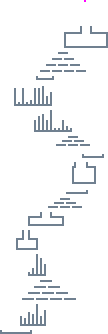

In [2]:
from IPython.display import Markdown
with open('input.txt', 'r') as file:
    rocks = [[[int(c.strip()) for c in coord.split(',')] for coord in line.split('->')] for line in file.read().strip().split('\n')]

def add_coords(c1, c2):
    return tuple(map(lambda a,b: a+b, c1, c2))
def sub_coords(c1, c2):
    return tuple(map(lambda a,b: a-b, c1, c2))

def print_area(area):
    min_x = 500
    max_x = 500
    min_y = 0
    max_y = 0
    for coord in area:
        min_x = min(coord[0], min_x)
        max_x = max(coord[0], max_x)
        min_y = min(coord[1], min_y)
        max_y = max(coord[1], max_y)
    print(f"min: {(min_x, min_y)}")
    print(f"max: {(max_x, max_y)}")
    print()
    disp = dict()
    for y in range(min_y, max_y+1):
        line = list()
        disp[y] = line
        for x in range(min_x, max_x+1):
            line.append(area.get((x,y), '.'))
    disp[0][500-min_x] = '*'
    for y in range(min_y, max_y+1):
        print(f"{y:4} {''.join(disp[y])}")
    
area = dict()
max_y = 0
for coords in rocks:
    for i in range(len(coords)-1):
        dist = sub_coords(coords[i+1], coords[i])
        step = (int(dist[0]/abs(dist[0])) if dist[0] else 0, int(dist[1]/abs(dist[1])) if dist[1] else 0)
        pos = tuple(coords[i])
        while pos != add_coords(coords[i+1],step):
            max_y = max(max_y, pos[1])
            area[pos] = '#'
            pos = add_coords(pos,step)       
display_area_svg(area,2)

## Part 1

Number of sands: 897


'min: (458, 0)'

'max: (511, 166)'

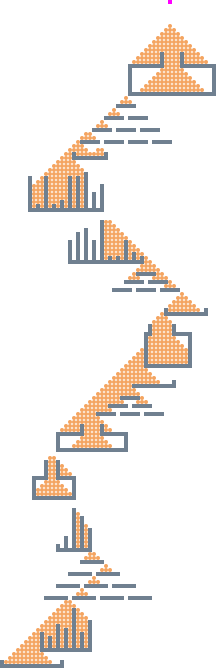

In [3]:
# display(HTML("<style>div.jp-OutputArea-output pre {white-space: pre;}</style>"))

def step_sand(area, pos):
    down = (pos[0], pos[1]+1)
    down_left = (down[0]-1, down[1])
    down_right = (down[0]+1, down[1])
    if down not in area:
        return down
    if down_left not in area:
        return down_left
    if down_right not in area:
        return down_right
    return pos

def drop_sand(area, start_pos, max_y):
    pos = start_pos
    while next_pos := step_sand(area, pos):
        if next_pos == pos:
            break
        if next_pos[1] == max_y:
            return False
        pos = next_pos
    area[pos] = 'o'
    return pos

part1 = area.copy()
count = 0
while drop_sand(part1, (500,0), max_y):
    count += 1
print(f"Number of sands: {count}")

display_area_svg(part1,4)

## Part 2

'Number of sands: 26683'

'min: (331, 0)'

'max: (669, 168)'

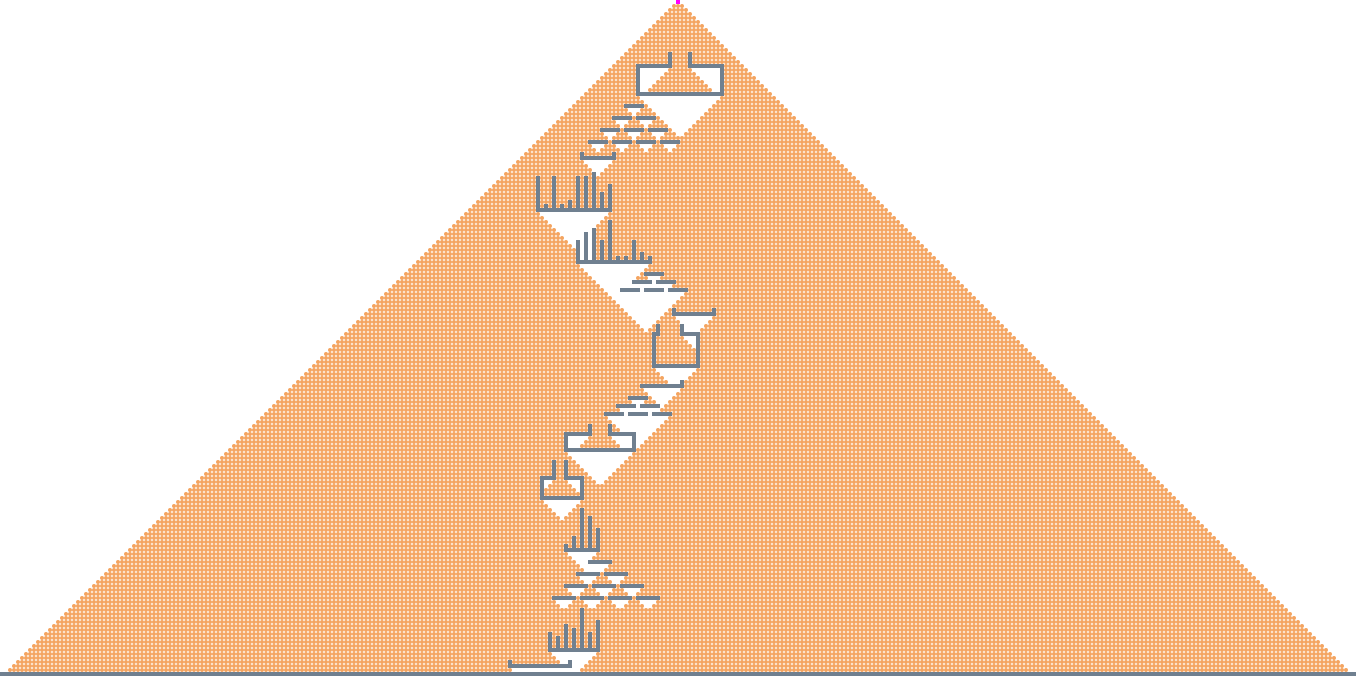

In [4]:


part2 = area.copy()

min_x = 500
max_x = 500
for coord in part2:
    if coord[0] < min_x:
        min_x = coord[0]
    elif coord[0] > max_x:
        max_x = coord[0]
# add floor
for i in range(min_x-5, max_x+6):
    part2[(i, max_y+2)] = '#'

count = 0
while True:
    dropped = drop_sand(part2, (500,0), max_y + 2)
    count += 1
    if dropped == (500,0):
        break
        
    if dropped: # increase floor
        part2[(dropped[0]-2, max_y+2)] = '#'
        part2[(dropped[0]+2, max_y+2)] = '#'

display(f"Number of sands: {count}") 
display_area_svg(part2,4)

